In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
color_list =["#3eb991","#6ecadc","#e9a820","#e01563","#edb196","#1f94ac","#ae9a6a","#ccb8a6","#343a44"]
test_output = pd.DataFrame(pd.read_csv("../data_files/test_output.csv"))

test_output = test_output.transpose()
test_output= test_output.reset_index(level=0)
display(test_output)
test_output = test_output.dropna()
column_name = list(test_output.iloc[0])
column_name = [ i.strip() for i in column_name]
test_output = test_output.drop(index=0)
test_output.columns = column_name
test_output["Tau_n"] = pd.to_numeric(test_output["Tau_n"])
display(test_output)

,index,0,1,2,3,4
0,Tau_n,Tau_M,Tau_H,Inf_n,Inf_M,Inf_H
1,5.45858,0.236767,8.51601,0.317677,0.052933,0.596121
2,5.44109,0.240475,8.49046,0.322563,0.054952,0.584954
3,5.42369,0.244118,8.46164,0.327335,0.056982,0.57402
4,5.40637,0.247707,8.42979,0.332008,0.059026,0.563296
...,...,...,...,...,...,...
497,5.45738,0.237023,8.51437,0.318015,0.05307,0.595349
498,5.45735,0.23703,8.51432,0.318025,0.053074,0.595327
499,5.45731,0.237038,8.51428,0.318035,0.053078,0.595304
500,5.45728.1,0.237046,8.51423,0.318045,0.053083,0.59528


ValueError: Unable to parse string "5.43127.1" at position 228

# Data Processing

# Graph 1
(first 3)

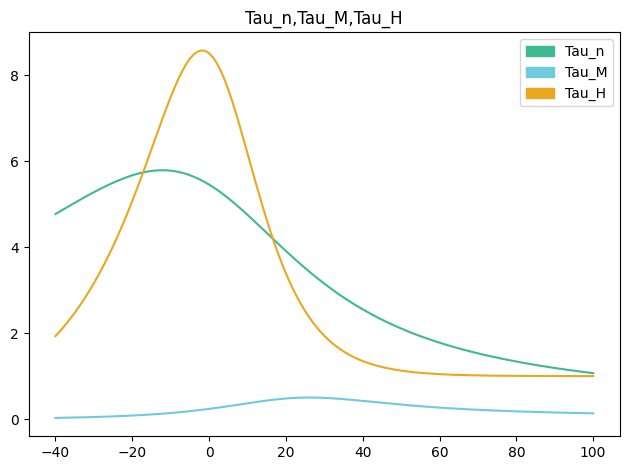

In [ ]:
first_3 =list(test_output.columns )[:3]
fig, ax = plt.subplots()
x = np.arange(-40, 101, step=1)

for i in range(3):
    label = first_3[i]
    #ax.scatter(x,test_output[label],color = color_list[i])
    ax.plot(x,test_output[label],color = color_list[i])
    
colorlist = zip(first_3,color_list)
handles = [mpatches.Patch(color=colour, label=first_3) for label, colour in colorlist]
t = ",".join(first_3)
plt.legend(handles, first_3, ncol=1, bbox_to_anchor=(1, 1))
plt.plot()
ax.set_title(t)
plt.tight_layout()
plt.savefig(f"../graphs/{t}.png")

# Graph 2

(141,)


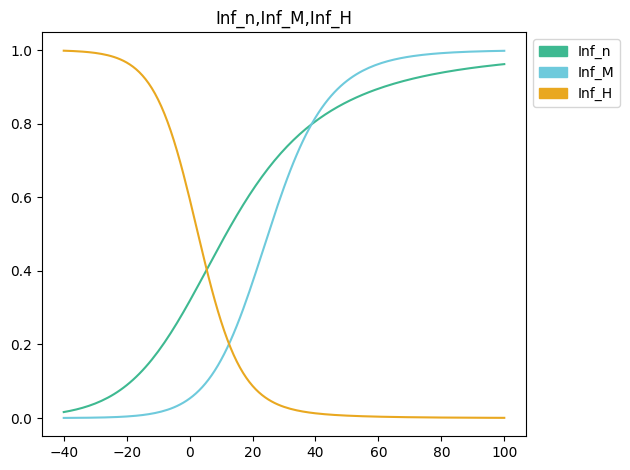

In [ ]:
first_3 = list(test_output.columns)[3:3+3]
fig, ax = plt.subplots()
x = np.arange(-40, 101, step=1)
print(x.shape)

for i in range(3):
    label = first_3[i]
    #ax.scatter(x,test_output[label],color = color_list[i])
    ax.plot(x,test_output[label],color = color_list[i])
    
colorlist = zip(first_3,color_list)
handles = [mpatches.Patch(color=colour, label=first_3) for label, colour in colorlist]
t = ",".join(first_3)
plt.legend(handles, first_3, ncol=1, bbox_to_anchor=(1, 1))
plt.plot()
ax.set_title(t)
plt.tight_layout()
plt.savefig(f"../graphs/{t}.png")

# Graph 6 Voltages

In [24]:
voltage = pd.DataFrame(pd.read_csv("../data_files/testV_output.csv"))[:4]

voltage = voltage.transpose().reset_index(level=0)


column =list(voltage.iloc[0])
column = [ i.strip() for i in column]
voltage = voltage.dropna()
voltage = voltage.drop(index=0)
voltage.columns = column
issue_col = list(voltage.columns)[0]

voltage[issue_col] = pd.to_numeric(voltage[issue_col])

#display(voltage) # this shows the voltage 
def graph_v_output(i, voltage):
    first_3 =  [list(voltage.columns)[i]]
    fig, ax = plt.subplots()
    size = len(voltage)
    x = np.arange(0,size, step=1)

    for i in range(len(first_3)):
        label = first_3[i]
        #ax.scatter(x,test_output[label],color = color_list[i])
        print(label)
        ax.plot(x,voltage[label],color = color_list[i])
        

    colorlist = zip(first_3,color_list)
    handles = [mpatches.Patch(color=colour, label=first_3) for label, colour in colorlist]
    t = ",".join(first_3)
    ax.set_title(t)
    plt.legend(handles, first_3, ncol=1, bbox_to_anchor=(1, 1))
    plt.plot()
    plt.tight_layout()
    plt.savefig(f"../graphs/{t}.png")


ValueError: Unable to parse string "-10.3635.1" at position 843

V


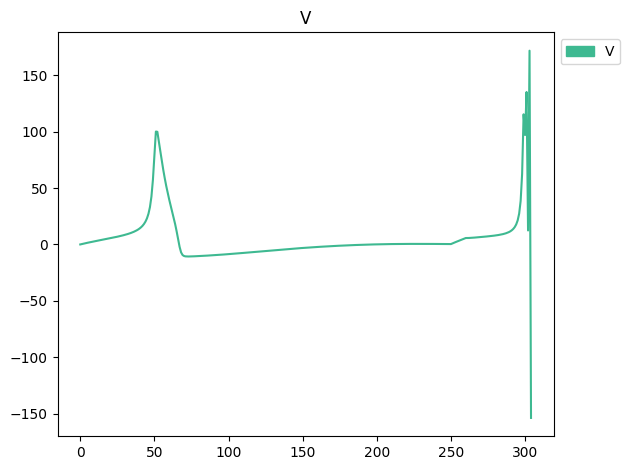

In [22]:
graph_v_output(0, voltage)


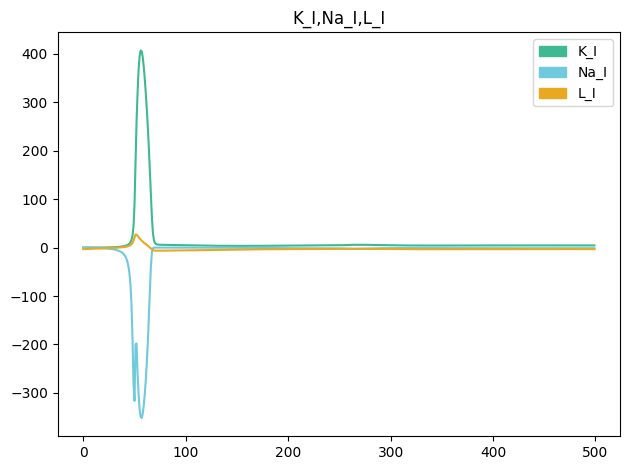

In [ ]:
first_3 =  list(voltage.columns)[1:]
fig, ax = plt.subplots()
size = len(voltage)
x = np.arange(0,size, step=1)

for i in range(len(first_3)):
    label = first_3[i]
    ax.plot(x,voltage[label],color = color_list[i])
    

colorlist = zip(first_3,color_list)
handles = [mpatches.Patch(color=colour, label=first_3) for label, colour in colorlist]
t = ",".join(first_3)
ax.set_title(t)
plt.legend(handles, first_3, ncol=1, bbox_to_anchor=(1, 1))
plt.plot()
plt.tight_layout()
plt.savefig(f"../graphs/{t}.png")